<a href="https://colab.research.google.com/github/Tstrebe2/math-for-ml/blob/main/probability/random-experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.3.1 Random Experiments


### Example 1:  
Lets take the most basic probability example of a coin flip. Our intuition might tell us that the coin has a 50% chance or .5 probability of landing on heads if we were to flip it in an unbiased manner. Lets say we want to test this hypothesis by conducting an experiment. We can use Python and the Numpy library to simulate an experiment in which we will run several trials of coin flips and obtain a sample proportion of heads and tails. Our sample space will be composed of all possible outcomes of our coin flip. For this experiment, the sample space is: $(H,T)$  

If our outcomes are discrete (i.e. true/false, heads/tails, or intergers) the events are disjoint or mutually exclusive, then they are equally likely to occur at random and our probability distribution will be uniform and discrete. The standard formula to derive a probability estimate of an event $P(e)$ from a discrete uniform probability distribuion is $P(e)=k/N$ where $k$ is the frequency that an event can occur and $N$ is the number of possible events. $N$ can be derived from the length of our sample space which in this case is 2. So the probability of heads or $P(H)=1/2$ and the probability of tails can be defined as $P(T)=1-P(H)$.

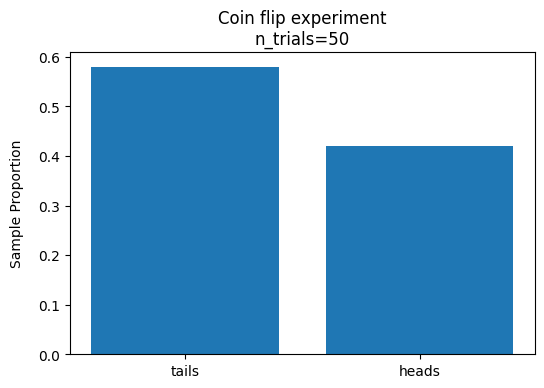

In [ ]:
def run_coinflip_experiment(n_trials = 50):
  # This is our sample space
  #   0: tails
  #   1: heads
  sample_space = np.array([0, 1])
  # This is the probability of the event occuring p(heads)
  p_event = .5
  # We will run a number of trials for our experiment and
  # observe the distribution of successes and failure
  trials = np.zeros(n_trials)

  for i in range(n_trials):
    # We'll run our trials using the 1-p_event for the probability of
    # tails and p_event for heads.
    trials[i] = np.random.choice(sample_space, p=[1-p_event, p_event])

  return trials

def plot_single_coinflip_experiment(experiment):
  x = np.array([0, 1])
  n_trials = len(experiment)
  n_heads = experiment.sum()
  n_tails = n_trials-n_heads
  y = np.array([n_tails/n_trials, n_heads/n_trials])

  _ = plt.figure(dpi=100)
  plt.bar(x, y)
  plt.xticks(x, labels=['tails', 'heads'])
  plt.ylabel('Sample Proportion', labelpad=10)
  plt.title('Coin flip experiment\nn_trials=%.f' % len(experiment))
  plt.show()

experiment = run_coinflip_experiment(n_trials=50)
plot_single_coinflip_experiment(experiment)

You can do a series of experiments by running the cell above over and over and I encourage you to do this. The may realize that the proportion of heads after 50 trials is not always that close to .5. If we increase the number of trials i.e. the number of times we flip the coin, you may notice that the error decreases and the proportion of heads after each experiment is more frequently closer to our probability estimate of .5. Run the cell below to re-run the experiment with 10,000 trials instead.

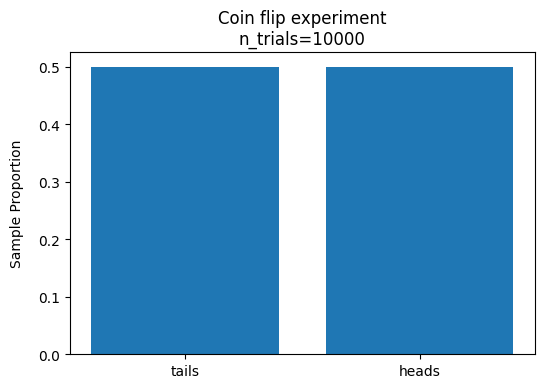

In [ ]:
experiment = run_coinflip_experiment(n_trials=10000)
plot_single_coinflip_experiment(experiment)

Instead of running the above code cells over and over again, we can use the computer to automate running a series of experiments for us to better test our hypothesis. We'll run 1,000 experiments and set n_trials at 50 and then at 1,000 and observe the distribution of the proportion of heads from each experiment. We'll also use mean-squared error as a measure of error from what we'd expect to see based on our probability estimate of .5. You can also alter the code to use the standard devation or standard error estimate as a measurement of error.

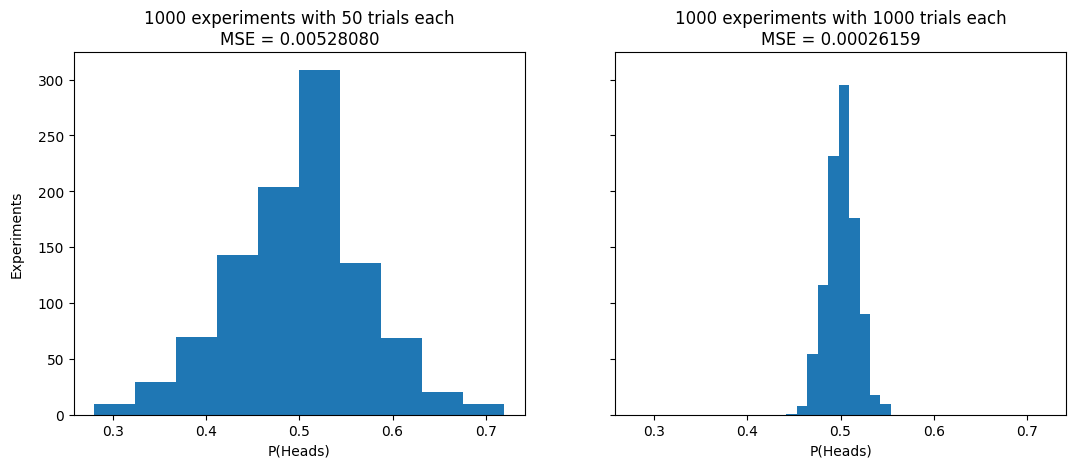

In [ ]:
n_experiments = 1000

def run_coinflip_experiments(n_experiments, n_trials):
  experiments = np.zeros(n_experiments)
  for i in range(n_experiments):
    experiment = run_coinflip_experiment(n_trials)
    experiments[i] = experiment.sum() / n_trials
  return experiments

experiments_50 = run_coinflip_experiments(n_experiments=n_experiments, n_trials=50)
experiments_1000 = run_coinflip_experiments(n_experiments=n_experiments, n_trials=1000)
# We can calculate the mean-squared error by using the sum of squares of the
# differences of the observed probabilities from our experiments and what
# we would expect the probability of heads would be using a fair two-sided coin (.5).
# You could also compute the standard error or standard deviation as well.
p_e = .5
mse_50 = np.sum((experiments_50 - p_e)**2) / n_experiments
mse_1000 = np.sum((experiments_1000 - p_e)**2) / n_experiments

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(6.4*2, 4.8), dpi=100)
ax1.hist(experiments_50)
ax2.hist(experiments_1000)
ax1.set_xlabel('P(Heads)')
ax2.set_xlabel('P(Heads)')
ax1.set_ylabel('Experiments', labelpad=10)
ax1.set_title('1000 experiments with 50 trials each\nMSE = %.8f' % mse_50)
ax2.set_title('1000 experiments with 1000 trials each\nMSE = %.8f' % mse_1000)
plt.show()

At this point it should be pretty clear that as we increase the number of trials in our experiment, the difference between our probability estimate (.5) and the observed probability becomes smaller. This is evidenced by differences in mean-squared error and the width of the two distributions.

### Example 2:  
If we modify our original experiment and instead of tossing the coin once, We toss a coin three times and observe the sequence of heads/tails. The sample space changes and becomes defined as:  
${(H,H,H),(H,H,T),(H,T,H),(T,H,H),(H,T,T),(T,H,T),(T,T,H),(T,T,T)}$  

For this problem, we can use iteration to generate the sample space and store it in a python list as follows:

In [ ]:
subspace = np.array([0,1])
sample_space = []
for i in range(subspace.shape[0]):
  for j in range(subspace.shape[0]):
    for k in range(subspace.shape[0]):
      sample_space.append((i, j, k))

sample_space

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

We can see that the sample space of this problem now has 8 different discrete outcomes vs our prior subspace which only had two. Now our $P(e)=1/8=0.125$  

We can test that this holds up to our expectations by running another experiment.

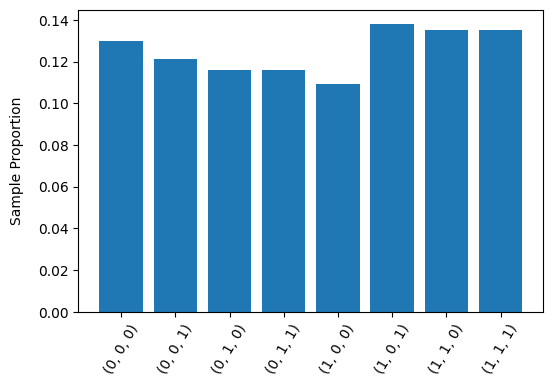

In [ ]:
def run_three_coinflips_experiment(n_trials = 50):
  # This is now our sample space
  #   0: tails
  #   1: heads
  subspace = np.array([0, 1])
  # This is the probability of the event occuring within our subspace p(heads)
  p_event = .5
  # We will run a number of trials for our experiment and
  # observe the distribution of successes and failure
  trials = np.zeros(n_trials)

  for i in range(n_trials):
    trial = []
    for j in range(3):
      flip = np.random.choice(subspace, p=[1-p_event, p_event])
      trial.append(flip)
    # Instead of storing all of the outcomes of our trials,
    # we'll store the indices of our sample space.
    trials[i] = sample_space.index(tuple(trial))

  return trials

n_trials = 1000
indices, value_counts = np.unique(run_three_coinflips_experiment(n_trials=n_trials), return_counts=True)
_ = plt.figure(dpi=100)
plt.bar(indices, value_counts/n_trials)
plt.xticks(indices, labels=sample_space, rotation=60)
plt.ylabel('Sample Proportion', labelpad=10)
plt.show()

We could also repeat this experiments numerous times to as we did above in example 1.

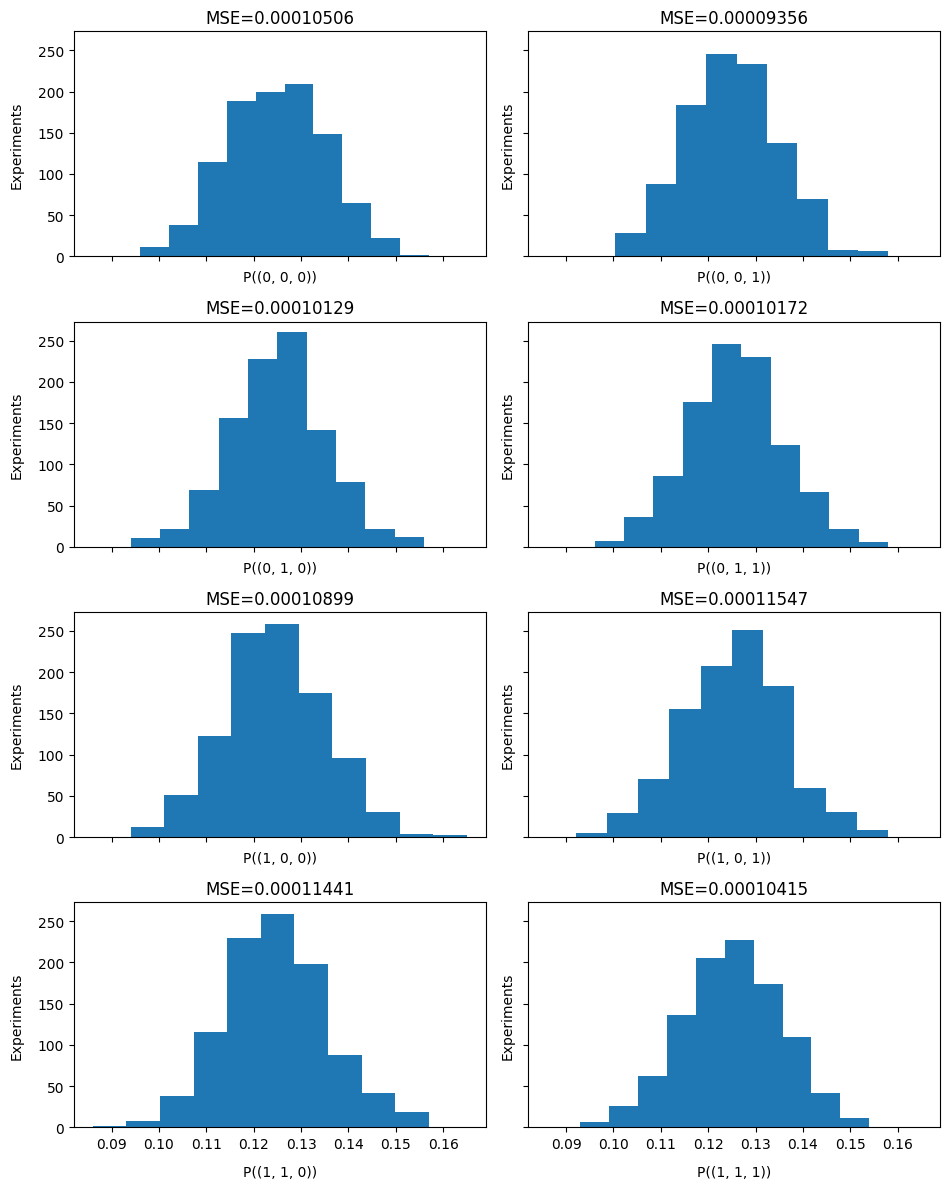

In [ ]:
n_experiments = 1000
n_trials = 1000
p_e = 1/len(sample_space)
experiments = np.empty((0, len(sample_space)))

for i in range(n_experiments):
  _, value_counts = np.unique(run_three_coinflips_experiment(n_trials=n_trials), return_counts=True)
  experiments = np.vstack((experiments, value_counts))

fig, axs = plt.subplots(ncols=2, 
                        nrows=4, 
                        figsize=(6.4*1.5, 4.8*2.5),
                        sharex=True,
                        sharey=True, 
                        dpi=100)
for i, ax in enumerate(axs.flat):
  sample_proportions = experiments[:, i]/n_trials
  mse = np.sum((sample_proportions - p_e)**2) / n_experiments
  ax.set_title('MSE=%.8f' % mse)
  ax.hist(sample_proportions)
  ax.set_ylabel('Experiments', labelpad=10)
  ax.set_xlabel('P({})'.format(sample_space[i]), labelpad=10)
  
plt.tight_layout()
plt.show()

We can see again here that the mean probability proportion from our experiment roughly matches our probability estimate of 1/8 or 0.125.